<a href="https://colab.research.google.com/github/judyschen/Profolio/blob/main/e_commerce_website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('E-commerce Website Logs new.csv')

<ipython-input-21-1f47f32cc26d>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('E-commerce Website Logs new.csv')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   accessed_date     172838 non-null  object
 1   duration_(secs)   172838 non-null  int64 
 2   network_protocol  172838 non-null  object
 3   ip                172838 non-null  object
 4   bytes             172838 non-null  int64 
 5   accessed_Ffom     172838 non-null  object
 6   age               172838 non-null  object
 7   gender            172838 non-null  object
 8   country           172838 non-null  object
 9   membership        172838 non-null  object
 10  language          172838 non-null  object
 11  sales             172838 non-null  object
 12  returned          172838 non-null  object
 13  returned_amount   172838 non-null  object
 14  pay_method        172838 non-null  object
dtypes: int64(2), object(13)
memory usage: 19.8+ MB


In [ ]:
# Make a new column that the date become date format
data['accessed_date'] = pd.to_datetime(data['accessed_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   accessed_date     172838 non-null  datetime64[ns]
 1   duration_(secs)   172838 non-null  int64         
 2   network_protocol  172838 non-null  object        
 3   ip                172838 non-null  object        
 4   bytes             172838 non-null  int64         
 5   accessed_Ffom     172838 non-null  object        
 6   age               172838 non-null  object        
 7   gender            172838 non-null  object        
 8   country           172838 non-null  object        
 9   membership        172838 non-null  object        
 10  language          172838 non-null  object        
 11  sales             172838 non-null  object        
 12  returned          172838 non-null  object        
 13  returned_amount   172838 non-null  object        
 14  pay_

In [ ]:
# Replace '--' to NaN
data['age'] = data['age'].replace('--', np.nan)

# convert age into numeric
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# calculate medium number
median_age = data['age'].median()

# replace NaN into medium
data['age'].fillna(median_age, inplace=True)

# Also, convert age into integer format
data['age'] = data['age'].astype(int)

# print medium
print("中位数年龄:", median_age)

中位数年龄: 21.0


In [ ]:
# define a value
def fix_number_format(value):
    # add a conditional
    if value.count('.') >= 2:
        corrected_value = value.replace('.', ',', 1)
        return corrected_value
    else:
        return value

# 对包含该格式的列应用函数
data['sales'] = data['sales'].apply(fix_number_format)
data['returned_amount'] = data['returned_amount'].apply(fix_number_format)

# 将修正后的数据转换为数字格式
data['sales'] = pd.to_numeric(data['sales'].str.replace(',', ''))
data['returned_amount'] = pd.to_numeric(data['returned_amount'].str.replace(',', ''))

In [ ]:
data.head(20)

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.960,No,0.000,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.940,No,0.000,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.620,No,0.000,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,9575.775,No,0.000,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.368,No,0.000,Cash
5,2017-03-14 18:17:09.005,3847,TCP,1.124.48.210,10200,Mozilla Firefox,28,Female,CA,Normal,English,48.860,No,0.000,Credit Card
6,2017-03-14 19:46:37.327,2090,TCP,1.124.48.99,310900,Mozilla Firefox,49,Female,CN,Normal,English,0.000,Yes,9575.775,Cash
7,2017-03-14 19:46:37.327,2793,TCP,1.126.48.118,10700,Mozilla Firefox,32,Female,AT,Normal,English,907.152,No,0.000,Credit Card
8,2017-03-14 19:02:42.704,3396,TCP,1.126.48.171,250200,Mozilla Firefox,69,Male,US,Normal,Spanish,18.504,No,0.000,Others
9,2017-03-14 19:02:42.704,2064,TCP,1.126.48.47,20600,Mozilla Firefox,60,Female,CA,Normal,Spanish,114.900,No,0.000,Credit Card


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   accessed_date     172838 non-null  datetime64[ns]
 1   duration_(secs)   172838 non-null  int64         
 2   network_protocol  172838 non-null  object        
 3   ip                172838 non-null  object        
 4   bytes             172838 non-null  int64         
 5   accessed_Ffom     172838 non-null  object        
 6   age               172838 non-null  int64         
 7   gender            172838 non-null  object        
 8   country           172838 non-null  object        
 9   membership        172838 non-null  object        
 10  language          172838 non-null  object        
 11  sales             172838 non-null  float64       
 12  returned          172838 non-null  object        
 13  returned_amount   172838 non-null  float64       
 14  pay_

In [ ]:
# 将数据导出到 Excel 文件中
data.to_excel('E-commerce Website Logs new.xlsx', index=False)  # 如果不想保存索引，可以将 index 参数设置为 False

#銷售趨勢分析

销售趋势分析：

针对销售趋势分析，你可以根据时间维度（例如日期或月份）对销售额进行聚合，并绘制时间序列图来观察销售趋势的变化。使用 groupby 函数和日期相关的列来计算每个时间段的销售额，然后使用 Matplotlib 或者其他可视化工具绘制趋势图。
产品销售分析：

对产品销售进行分析时，你可以计算不同产品的销售额、销售数量、平均价格等指标。使用 groupby 函数对产品相关的列进行聚合，然后根据需要绘制柱状图、饼图或者其他图表来展示产品销售情况。
用户行为分析：

分析用户行为可以包括用户访问频率、浏览页面数量、购买行为等。你可以计算不同用户的访问次数、购买次数等指标，并探索用户行为的模式和趋势。使用适当的统计方法或可视化工具来展示用户行为数据。
地理分析：

进行地理分析时，你可以根据用户的地理位置信息（例如国家或地区）来分析销售情况、用户分布等。使用 groupby 函数对地理位置相关的列进行聚合，然后绘制地图或者其他地理信息图表来展示地理分布情况。
建模和预测：

如果你想要进行更深入的分析和预测，你可以尝试使用机器学习或统计分析方法来构建模型。例如，你可以使用回归分析来预测销售额的变化，或者使用聚类分析来识别用户群体。在进行建模前，确保你的数据已经准备好，并且选择适当的特征和目标变量。

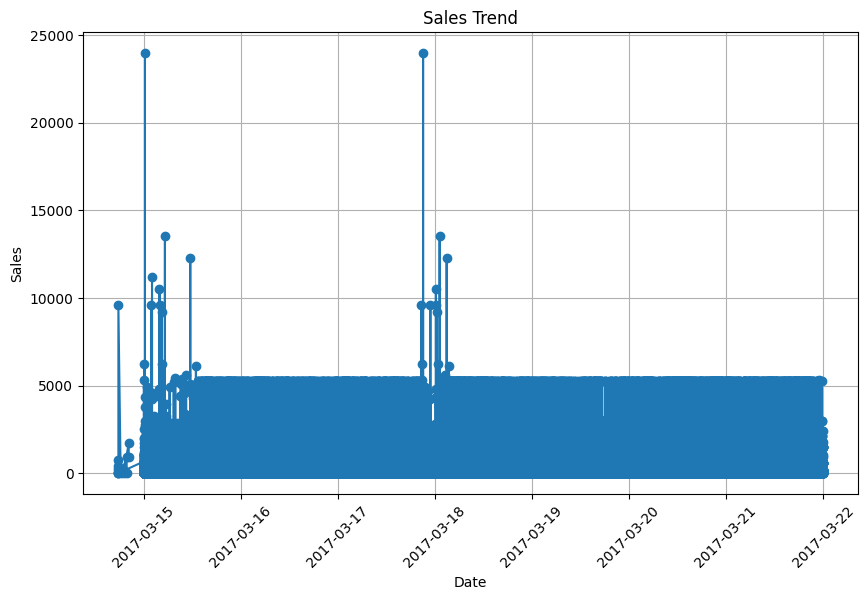

In [ ]:
# 创建折线图
plt.figure(figsize=(10, 6))
plt.plot(data['accessed_date'], data['sales'], marker='o', linestyle='-')

# 添加标题和标签
plt.title('Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# 旋转日期标签，使其更易于阅读
plt.xticks(rotation=45)

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()


#Building Model and Machine Learning

When evaluating a model, the next steps depend on the performance metrics and the context of your problem. In this case, the mean squared error (MSE) is quite high, and the R^2 score is close to zero or negative, indicating that the model's predictions are not accurate and do not explain much of the variance in the data.

In [ ]:
# Convert 'returned' into dummy variables
dummy_returned = pd.get_dummies(data['returned'], drop_first=True)  # drop_first=True to avoid multicollinearity
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   accessed_date       172838 non-null  datetime64[ns]
 1   duration_(secs)     172838 non-null  int64         
 2   network_protocol    172838 non-null  object        
 3   ip                  172838 non-null  object        
 4   bytes               172838 non-null  int64         
 5   accessed_Ffom       172838 non-null  object        
 6   age                 172838 non-null  int64         
 7   gender              172838 non-null  object        
 8   country             172838 non-null  object        
 9   membership          172838 non-null  object        
 10  language            172838 non-null  object        
 11  sales               172838 non-null  float64       
 12  returned            172838 non-null  object        
 13  returned_amount     172838 no

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'membership' column
X['membership_encoded'] = label_encoder.fit_transform(X['membership'])

# Drop the original 'membership' column
X.drop('membership', axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

In [ ]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Define features (X) and target variable (y)
X = data[['membership_encoded']]  # You can include more features if needed
y = data[['sales']]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 644559.9300534875
R^2 Score: 4.267063765572843e-05


Accuracy: The proportion of correctly classified instances among the total instances. In your case, it means that approximately 89.23% of the instances are correctly classified.

Precision: The proportion of true positive predictions among all positive predictions made by the model. In your case, it means that around 54.55% of the instances predicted as positive are actually positive.

Recall: Also known as sensitivity or true positive rate, it measures the proportion of true positive predictions among all actual positive instances. A recall of 1.0 means that all positive instances are correctly identified by the model.

F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. In your case, it's approximately 70.59%.

Mean Squared Error (MSE): The average squared difference between the predicted values and the actual values. It measures the average of the squares of the errors. In your case, it's 0.1077.

R^2 Score: Also known as the coefficient of determination, it represents the proportion of the variance in the dependent variable that is predictable from the independent variables. In your case, it's 0.0431, which indicates a low predictive power of the model.

Overall, the model seems to have a high accuracy, but the precision is relatively low, indicating that there might be a higher false positive rate. Additionally, the recall is 1.0, suggesting that the model correctly identifies all actual positive instances, but this needs to be balanced with precision to avoid overfitting. The F1-score provides a harmonic mean between precision and recall, giving a balanced measure of the model's performance. The MSE and R^2 score provide insights into the model's predictive accuracy and explainability, respectively.





In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = data[['duration_(secs)']]  # Example features
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1)  # Set the regularization parameter (alpha) as needed

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Ridge Regression):", mse)


Mean Squared Error (Ridge Regression): 644605.2638227452


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target variable (y)
X = data[['duration_(secs)', 'age']]  # Example features
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Lasso Regression model
lasso_model = Lasso(alpha=500)  # Set the regularization parameter (alpha) as needed

# Train the model on the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Lasso Regression):", mse)

Mean Squared Error (Lasso Regression): 644608.02519613


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define features (X) and target variable (y)
X = data[['duration_(secs)']]  # You can include more features if needed
y = data['sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regression - Mean Squared Error:", mse_dt)
print("Decision Tree Regression - R^2 Score:", r2_dt)


Decision Tree Regression - Mean Squared Error: 663785.7422474308
Decision Tree Regression - R^2 Score: -0.029783868245520262


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression - Mean Squared Error:", mse_rf)
print("Random Forest Regression - R^2 Score:", r2_rf)


Random Forest Regression - Mean Squared Error: 663867.9016520877
Random Forest Regression - R^2 Score: -0.029911328695715778


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the gradient boosting regressor
gradient_boosting = GradientBoostingRegressor(n_estimators=500, random_state=42)

# Train the model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regression - Mean Squared Error:", mse_gb)
print("Gradient Boosting Regression - R^2 Score:", r2_gb)


Gradient Boosting Regression - Mean Squared Error: 646467.5523868677
Gradient Boosting Regression - R^2 Score: -0.0029167763353517007


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Generate a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming X and y are your feature matrix and target variable
X = data[['duration_(secs)']].values
y = data['sales'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error:", mse)


Epoch 1/50
3889/3889 [==============================] - 10s 2ms/step - loss: 644454.0625 - val_loss: 615972.5000
Epoch 2/50
3889/3889 [==============================] - 9s 2ms/step - loss: 633402.7500 - val_loss: 615948.2500
Epoch 3/50
3889/3889 [==============================] - 8s 2ms/step - loss: 633427.4375 - val_loss: 615890.2500
Epoch 4/50
3889/3889 [==============================] - 8s 2ms/step - loss: 633380.5625 - val_loss: 615839.7500
Epoch 5/50
3889/3889 [==============================] - 8s 2ms/step - loss: 633406.8125 - val_loss: 615944.5000
Epoch 6/50
3889/3889 [==============================] - 8s 2ms/step - loss: 633422.8750 - val_loss: 615812.8750
Epoch 7/50
3889/3889 [==============================] - 9s 2ms/step - loss: 633336.1875 - val_loss: 616526.5625
Epoch 8/50
3889/3889 [==============================] - 8s 2ms/step - loss: 633395.2500 - val_loss: 615833.0625
Epoch 9/50
3889/3889 [==============================] - 9s 2ms/step - loss: 633354.1875 - val_loss: 615